# Importación de los Datos

In [22]:
import pandas as pd
import numpy as np

# Nombre de las columnas
columns = ["Class", "Alcohol", "Malic Acid", "Ash", "Alcalinity of Ash", "Magnesium", "Total Phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]

# Importacion
data = pd.read_csv('wine.data', names = columns)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic Acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of Ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total Phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

# Selección de los Datos
El modelo se encargará de predecir la clase de vino a la que pertenece cada registro, por ello, nuestro atributo "class" será la variable dependiente.

A continuación se realiza la division de variables, datos de entrenamiento y datos de prueba.

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# Separacion variables independientes y dependiente
x = data[columns[1:]]
y = data[columns[0]]

# Separación de los datos de entrenamiento y de prueba. (70% entrenamiento / 30% Prueba)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7)

print('Total de datos:', len(data))
print('No. de datos de entreamiento:', len(x_train))
print('No. de datos para prediccion:', len(x_test))

Total de datos: 178
No. de datos de entreamiento: 124
No. de datos para prediccion: 54


# Implementacion del Modelo

##### Debido a que se busca asignar una clase a cada uno de los registros se necesita un modelo de clasificación, es por ello que se emplea el siguiente modelo:
---
### **Árbol de Decisión** / Métrica Calidad de Información: Entropía

In [25]:
# Importacion del modelo
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

In [26]:
# Instanciación del modelo
model = DecisionTreeClassifier(criterion = "entropy")

# Entrenamiento del modelo
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

### Visualicación del Modelo Obtenido:

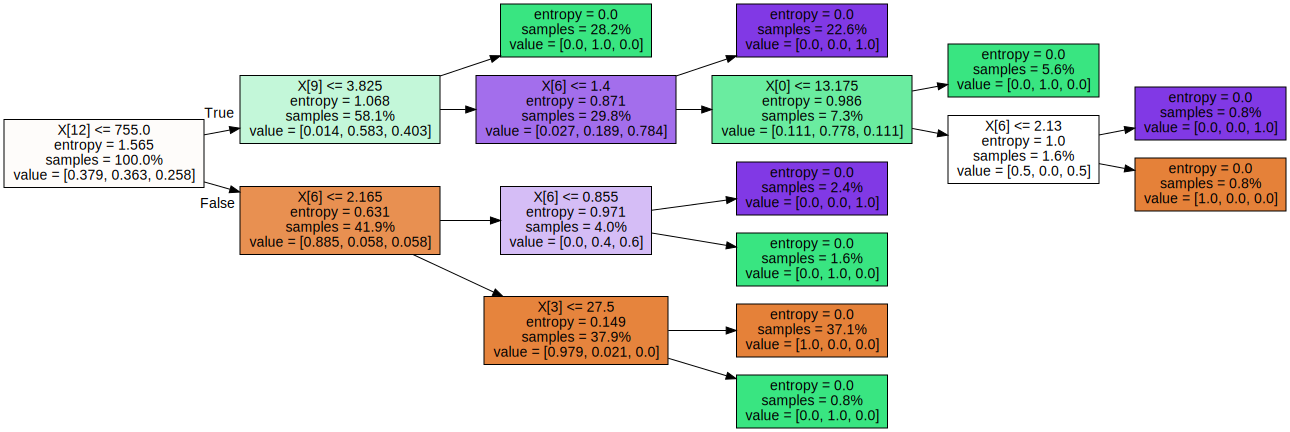

In [27]:
treeData = export_graphviz(model, filled=True, proportion=True, rotate = True)
graphviz.Source(treeData)

# Desempeño del modelo
Comparativa de desempeño del modelo con los datos de entrenamiento y los de prueba/validación

In [28]:
from sklearn.metrics import r2_score, mean_squared_error

In [29]:
# Prediccion para el conjunto de datos de entrenamiento
train_prediction = model.predict(x_train)

# Prediccion para el conjunto de datos de prueba / validación
test_prediction = model.predict(x_test)


# Evaluación del modelo con los datos de entrenamiento
train_score = model.score(x_train, y_train)

# Evaluación del modelo con los datos de entrenamiento
test_score = model.score(x_test, y_test)

print("Presición Modelo Datos de Entrenamiento:", train_score)
print("Presición Modelo Datos de Prueba:", test_score)

Presición Modelo Datos de Entrenamiento: 1.0
Presición Modelo Datos de Prueba: 0.9814814814814815


# Visualización: Salida del Modelo

In [31]:
# Predicción de todos los datos
y_pred = model.predict(x)

# Comparación primeros 10 datos
comp_table = pd.DataFrame({'Clase Real': data['Class'], 'Prediccion': y_pred, columns[1]: data[columns[1]], columns[2]: data[columns[2]], columns[3]: data[columns[3]], columns[4]: data[columns[4]], columns[5]: data[columns[5]], columns[6]: data[columns[6]], columns[7]: data[columns[7]], columns[8]: data[columns[8]], columns[9]: data[columns[9]], columns[10]: data[columns[10]], columns[11]: data[columns[11]], columns[12]: data[columns[12]], columns[13]: data[columns[13]]})
comp_table.head(10)

,Clase Real,Prediccion,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045
